# Chapter 10. Introduction to Artificial Neural Networks

In [10]:
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width 
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## From Biological to Artificial Neurons


- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.
- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s Law, but also thanks to the gaming industry, which has produced powerful GPU cards by the millions.
- The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have a huge positive impact.
- Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (or when it is the case, they are usually fairly close to the global optimum).
- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress, and even more amazing products.

## Logical Computations with Neurons

- The first network on the left is simply the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A), but if neuron A is off, then neuron C is off as well.
- The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).
- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and if neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

## The Perceptron

#### The LTU computes a weighted sum of its inputs (z = w1 x1 + w2 x2 + + wn xn= wT · x), then applies a step function to that sum and outputs the result: hw(x) = step (z) = step (wT · x).

## Multi-Layer Perceptron and Backpropagation

#### Every layer except the output layer includes a bias neuron and is fully connected to the next layer. When an ANN has two or more hidden layers, it is called a deep neural network (DNN).

In [11]:
import numpy as np
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron

In [12]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width 
y = (iris.target == 0).astype(np.int) # Iris Setosa?

In [13]:
per_clf = Perceptron(random_state=42) 
per_clf.fit(X, y)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
y_pred = per_clf.predict([[2, 0.5]])

In [15]:
y_pred

array([1])

#### When the classes are exclusive (e.g., classes 0 through 9 for digit image classification), the output layer is typically modified by replacing the individual activation functions by a shared softmax function (see Figure 10-9). The softmax function was introduced in Chapter 3. The output of each neuron corresponds to the estimated probability of the corresponding class. Note that the signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network (FNN).

#### Biological neurons seem to implement a roughly sigmoid (S-shaped) activation function, so researchers stuck to sigmoid functions for a very long time. But it turns out that the ReLU activation function generally works better in ANNs. This is one of the cases where the biological analogy was misleading.


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

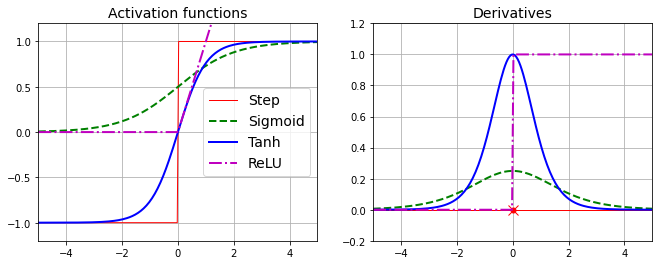

In [20]:
import matplotlib
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

In [21]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

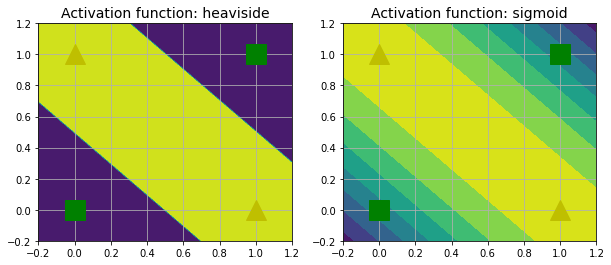

In [22]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## Training an MLP with TensorFlow’s High-Level API

In [24]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 3s 0us/step


In [26]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9k/wmt9ld_n6p9dv0qwlh2ks9vc0000gn/T/tmph5jvn7q6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1309954d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
T

INFO:tensorflow:global_step/sec: 461.51
INFO:tensorflow:loss = 2.1405203, step = 5401 (0.216 sec)
INFO:tensorflow:global_step/sec: 458.505
INFO:tensorflow:loss = 0.7662079, step = 5501 (0.218 sec)
INFO:tensorflow:global_step/sec: 439.116
INFO:tensorflow:loss = 2.1862512, step = 5601 (0.228 sec)
INFO:tensorflow:global_step/sec: 470.777
INFO:tensorflow:loss = 0.50239396, step = 5701 (0.212 sec)
INFO:tensorflow:global_step/sec: 472.727
INFO:tensorflow:loss = 4.3070416, step = 5801 (0.211 sec)
INFO:tensorflow:global_step/sec: 467.331
INFO:tensorflow:loss = 2.4678338, step = 5901 (0.214 sec)
INFO:tensorflow:global_step/sec: 454.525
INFO:tensorflow:loss = 0.41524413, step = 6001 (0.220 sec)
INFO:tensorflow:global_step/sec: 465.331
INFO:tensorflow:loss = 0.46810997, step = 6101 (0.215 sec)
INFO:tensorflow:global_step/sec: 469.113
INFO:tensorflow:loss = 3.47991, step = 6201 (0.213 sec)
INFO:tensorflow:global_step/sec: 472.092
INFO:tensorflow:loss = 0.014321657, step = 6301 (0.212 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 423.741
INFO:tensorflow:loss = 0.011298732, step = 13601 (0.236 sec)
INFO:tensorflow:global_step/sec: 191.406
INFO:tensorflow:loss = 0.09974316, step = 13701 (0.523 sec)
INFO:tensorflow:global_step/sec: 382.063
INFO:tensorflow:loss = 0.059947047, step = 13801 (0.262 sec)
INFO:tensorflow:global_step/sec: 416.335
INFO:tensorflow:loss = 0.11105114, step = 13901 (0.241 sec)
INFO:tensorflow:global_step/sec: 405.876
INFO:tensorflow:loss = 0.029988535, step = 14001 (0.246 sec)
INFO:tensorflow:global_step/sec: 457.358
INFO:tensorflow:loss = 0.13872606, step = 14101 (0.219 sec)
INFO:tensorflow:global_step/sec: 460.666
INFO:tensorflow:loss = 0.2174665, step = 14201 (0.217 sec)
INFO:tensorflow:global_step/sec: 451.991
INFO:tensorflow:loss = 0.04068026, step = 14301 (0.222 sec)
INFO:tensorflow:global_step/sec: 431.428
INFO:tensorflow:loss = 0.087000094, step = 14401 (0.231 sec)
INFO:tensorflow:global_step/sec: 465.991
INFO:tensorflow:loss = 0.09892695, step = 14501

INFO:tensorflow:global_step/sec: 462.77
INFO:tensorflow:loss = 0.029503638, step = 21701 (0.216 sec)
INFO:tensorflow:global_step/sec: 486.289
INFO:tensorflow:loss = 0.0036707963, step = 21801 (0.205 sec)
INFO:tensorflow:global_step/sec: 462.349
INFO:tensorflow:loss = 0.06373185, step = 21901 (0.216 sec)
INFO:tensorflow:global_step/sec: 466.08
INFO:tensorflow:loss = 0.037584778, step = 22001 (0.215 sec)
INFO:tensorflow:global_step/sec: 471.523
INFO:tensorflow:loss = 0.042158347, step = 22101 (0.212 sec)
INFO:tensorflow:global_step/sec: 474.023
INFO:tensorflow:loss = 0.020872077, step = 22201 (0.211 sec)
INFO:tensorflow:global_step/sec: 473.516
INFO:tensorflow:loss = 0.022516347, step = 22301 (0.211 sec)
INFO:tensorflow:global_step/sec: 456.527
INFO:tensorflow:loss = 0.038242143, step = 22401 (0.218 sec)
INFO:tensorflow:global_step/sec: 470.487
INFO:tensorflow:loss = 0.013408894, step = 22501 (0.213 sec)
INFO:tensorflow:global_step/sec: 428.684
INFO:tensorflow:loss = 0.038425893, step = 

INFO:tensorflow:global_step/sec: 472.908
INFO:tensorflow:loss = 0.010210028, step = 29801 (0.211 sec)
INFO:tensorflow:global_step/sec: 462.896
INFO:tensorflow:loss = 0.0040484145, step = 29901 (0.216 sec)
INFO:tensorflow:global_step/sec: 464.844
INFO:tensorflow:loss = 0.010947864, step = 30001 (0.215 sec)
INFO:tensorflow:global_step/sec: 475.994
INFO:tensorflow:loss = 0.037717234, step = 30101 (0.210 sec)
INFO:tensorflow:global_step/sec: 455.51
INFO:tensorflow:loss = 0.00614236, step = 30201 (0.219 sec)
INFO:tensorflow:global_step/sec: 441.021
INFO:tensorflow:loss = 0.010165165, step = 30301 (0.227 sec)
INFO:tensorflow:global_step/sec: 453.735
INFO:tensorflow:loss = 0.010488946, step = 30401 (0.221 sec)
INFO:tensorflow:global_step/sec: 428.346
INFO:tensorflow:loss = 0.02322701, step = 30501 (0.233 sec)
INFO:tensorflow:global_step/sec: 464.345
INFO:tensorflow:loss = 0.010951215, step = 30601 (0.216 sec)
INFO:tensorflow:global_step/sec: 455.729
INFO:tensorflow:loss = 0.013886314, step = 

INFO:tensorflow:loss = 0.038288977, step = 37801 (0.307 sec)
INFO:tensorflow:global_step/sec: 323.485
INFO:tensorflow:loss = 0.009287237, step = 37901 (0.309 sec)
INFO:tensorflow:global_step/sec: 439.301
INFO:tensorflow:loss = 0.030729126, step = 38001 (0.228 sec)
INFO:tensorflow:global_step/sec: 405.177
INFO:tensorflow:loss = 0.0009359424, step = 38101 (0.247 sec)
INFO:tensorflow:global_step/sec: 410.545
INFO:tensorflow:loss = 0.025784096, step = 38201 (0.244 sec)
INFO:tensorflow:global_step/sec: 391.114
INFO:tensorflow:loss = 0.009203034, step = 38301 (0.257 sec)
INFO:tensorflow:global_step/sec: 387.976
INFO:tensorflow:loss = 0.031165862, step = 38401 (0.256 sec)
INFO:tensorflow:global_step/sec: 405.612
INFO:tensorflow:loss = 0.009373352, step = 38501 (0.247 sec)
INFO:tensorflow:global_step/sec: 353.489
INFO:tensorflow:loss = 0.0103499545, step = 38601 (0.283 sec)
INFO:tensorflow:global_step/sec: 397.004
INFO:tensorflow:loss = 0.013584762, step = 38701 (0.252 sec)
INFO:tensorflow:glo

#### The code first creates a set of real valued columns from the training set (other types of columns, such as categorical columns, are available). Then we create the DNNClassifier, and we wrap it in a Scikit- Learn compatibility helper. Finally, we run 40,000 training iterations using batches of 50 instances. If you run this code on the MNIST dataset (after scaling it, e.g., by using Scikit-Learn’s StandardScaler), you will actually get a model that achieves around 98.2% accuracy on the test set!

In [27]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-21T16:13:25Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/9k/wmt9ld_n6p9dv0qwlh2ks9vc0000gn/T/tmph5jvn7q6/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-21-16:13:26
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9808, average_loss = 0.09708719, global_step = 44000, loss = 12.289517
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: /var/folders/9k/wmt9ld_n6p9dv0qwlh2ks9vc0000gn/T/tmph5jvn7q6/model.ckpt-44000


In [28]:
eval_results

{'accuracy': 0.9808,
 'average_loss': 0.09708719,
 'loss': 12.289517,
 'global_step': 44000}

#### The tensorflow.contrib package contains many useful functions, but it is a place for experimental code that has not yet graduated to be part of the core TensorFlow API. So the DNNClassifier class (and any other contrib code) may change without notice in the future.

In [30]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9k/wmt9ld_n6p9dv0qwlh2ks9vc0000gn/T/tmph5jvn7q6/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -4.4537587,  -2.550416 ,  -2.5361922,   2.8676057,  -6.3825665,
         -6.7547445, -18.370886 ,  21.640003 ,  -2.1225886,  -0.2778325],
       dtype=float32),
 'probabilities': array([4.6518254e-12, 3.1205767e-11, 3.1652781e-11, 7.0347901e-09,
        6.7600922e-13, 4.6592640e-13, 4.2023525e-18, 1.0000000e+00,
        4.7867120e-11, 3.0283431e-10], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object)}

## Training a DNN Using Plain TensorFlow

### Construction Phase

In [32]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [33]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [34]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [39]:
def neuron_layer(X, n_neurons, name, activation=None): 
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev) 
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z) 
        else:
            return Z

### 1. First we create a names cope using the name of thelayer :it will contain all the computation nodes for this neuron layer. This is optional, but the graph will look much nicer in TensorBoard if its nodes are well organized.

### 2. Next,we get the number of inputs by looking up the input matrix’s shape and getting the size of the second dimension (the first dimension is for instances).


### The next three lines createa W variable that will hold the weights matrix(often called the layer’s kernel). It will be a 2D tensor containing all the connection weights between each input and each neuron; hence, its shape will be (n_inputs, n_neurons). It will be initialized randomly, using a truncated10 normal (Gaussian) distribution with a standard deviation of   . Using this specific standard deviation helps the algorithm converge much faster (we will discuss this further in Chapter 11; it is one of those small tweaks to neural networks that have had a tremendous impact on their efficiency). It is important to initialize connection weights randomly for all hidden layers to avoid any symmetries that the Gradient Descent algorithm would be unable to break.

### 4. The next line creates ab variable for biases, initialized to 0(no symmetry issue in this case),with one bias parameter per neuron.

### 5. Then we createa sub graph to compute Z=X·W+b. This vectorized implementation will efficiently compute the weighted sums of the inputs plus the bias term for each and every neuron in the layer, for all the instances in the batch in just one shot.


### 6. Finally,if a nactivation parameter is provided, such as tf.nn.relu(i.e.,max(0,Z)),then the code returns activation(Z), or else it just returns Z.